## Exercise 2.2
A sawtooth signal has a waveform that ramps up linearly from -1 to 1, then drops to -1 and repeats. See http://en.wikipedia.org/wiki/Sawtooth_wave

Write a class called `SawtoothSignal` that extends `Signal` and provides `evaluate` to evaluate a sawtooth signal.

Compute the spectrum of a sawtooth wave. How does the harmonic structure compare to triangle and square waves?

In [221]:
# Get thinkdsp.py

import os

if not os.path.exists('thinkdsp.py'):
    from urllib.request import urlretrieve
    urlretrieve("https://github.com/AllenDowney/ThinkDSP/raw/master/code/thinkdsp.py", "thinkdsp.py")

In [222]:
from thinkdsp import Sinusoid
from thinkdsp import normalize, unbias
import numpy as np

class SawtoothSignal(Sinusoid):

    def evaluate(self, ts):
        cycles = self.freq * ts + self.offset / np.pi / 2
        frac, _ = np.modf(cycles)
        ys = normalize(unbias(frac), self.amp)
        return ys

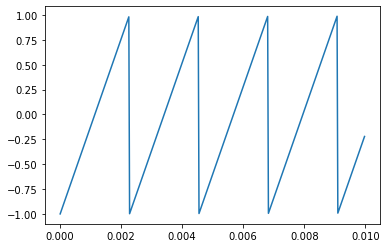

In [223]:
saw_wav = SawtoothSignal().make_wave(duration=0.5, framerate=40000)
saw_wav.segment(start=0, duration=0.01).plot()
saw_wav.make_audio()

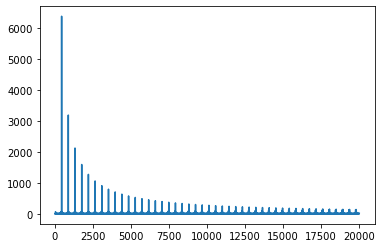

In [224]:
saw_wav.make_spectrum().plot()

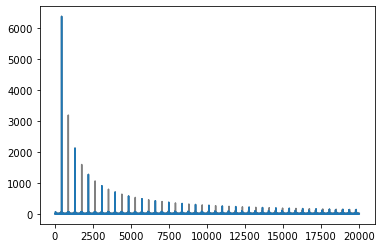

In [225]:
from thinkdsp import SquareSignal

saw_wav.make_spectrum().plot(color='gray')
square_wav = SquareSignal(amp=0.5).make_wave(duration=0.5, framerate=40000)
square_wav.make_spectrum().plot()

In [226]:
square_wav.make_audio()

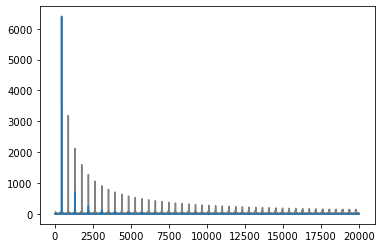

In [227]:
from thinkdsp import TriangleSignal

saw_wav.make_spectrum().plot(color='gray')
triangle_wav = TriangleSignal(amp=0.79).make_wave(duration=0.5, framerate=40000)
triangle_wav.make_spectrum().plot()

In [228]:
triangle_wav.make_audio()

## Exercise 2.3
Make a square signal at 1500 Hz and make a wave that samples it
at 10000 frames per second.  If you plot the spectrum, you can
see that most of the harmonics are aliased.
When you listen to the wave, can you hear the aliased harmonics?

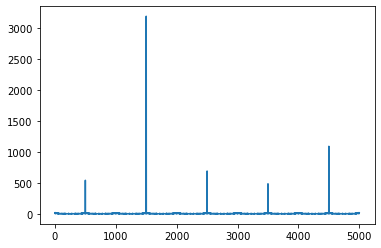

In [229]:
square_wav1 = SquareSignal(1500).make_wave(duration=0.5, framerate=10000)
square_wav1.make_spectrum().plot()

In [230]:
square_wav1.make_audio()

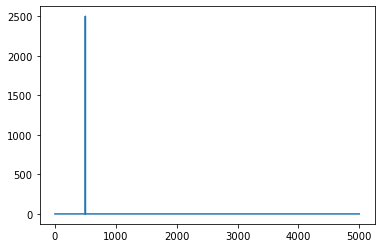

In [231]:
from thinkdsp import SinSignal

sin_wav = SinSignal(500).make_wave(duration=0.5, framerate=10000)
sin_wav.make_spectrum().plot()

In [232]:
sin_wav.make_audio()

## Exercise 2.4

If you have a spectrum object, `spectrum`, and print the first few values of `spectrum.fs`, you’ll see that the frequencies start at zero. So `spectrum.hs[0]` is the magnitude of the component with frequency 0. But what does that mean?

Try this experiment:

1.    Make a triangle signal with frequency 440 and make a Wave with duration 0.01 seconds. Plot the waveform.
2.    Make a Spectrum object and print `spectrum.hs[0]`. What is the amplitude and phase of this component?
3.    Set `spectrum.hs[0] = 100`. Make a Wave from the modified Spectrum and plot it. What effect does this operation have on the waveform?

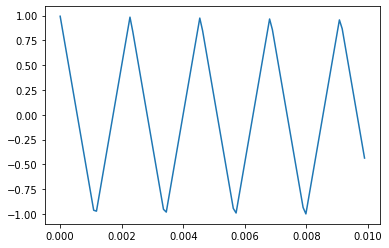

In [233]:
triangle = TriangleSignal().make_wave(duration=0.01)
triangle.plot()

In [234]:
spectrum = triangle.make_spectrum()
spectrum.hs[0]

(1.0436096431476471e-14+0j)

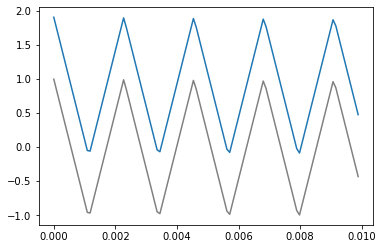

In [235]:
spectrum.hs[0] = 100
triangle.plot(color='gray')
spectrum.make_wave().plot()

## Exercise 2.5

Write a function that takes a Spectrum as a parameter and modifies it by dividing each element of hs by the corresponding frequency from fs. Test your function using one of the WAV files in the repository or any Wave object.

1. Compute the Spectrum and plot it.
2. Modify the Spectrum using your function and plot it again.
3. Make a Wave from the modified Spectrum and listen to it. What effect does this operation have on the signal?

In [236]:
def filter_spectrum(s):
    s.hs[1:] /= s.fs[1:]
    s.hs[0] = 0

In [237]:
square_wav2 = SquareSignal(freq=440).make_wave(duration=0.5)
square_wav2.make_audio()

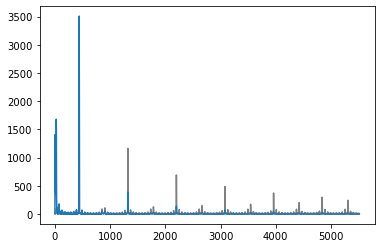

In [238]:
spectrum_square = square_wav2.make_spectrum()
spectrum_square.plot(high=10000, color='gray')
filter_spectrum(spectrum_square)
spectrum_square.scale(440)
spectrum_square.plot(high=10000)

In [239]:
spectrum_square.make_wave().make_audio()

## Exercise 2.5

The triangle and square waves have odd harmonics only; the sawtooth wave has both even and odd harmonics. The harmonics of the square and sawtooth waves drop off in proportion to $1/f$; the harmonics of the triangle wave drop off like $1/f^2$. Can you find a waveform that has even and odd harmonics that drop off like $1/f^2$?

Hint: There are two ways you could approach this: you could
construct the signal you want by adding up sinusoids, or you
could start with a signal that is similar to what you want and
modify it.

In [240]:
freq = 500
signal = SawtoothSignal(freq=freq)
sawtooth_wave = signal.make_wave(duration=0.5, framerate=20000)
sawtooth_wave.make_audio()

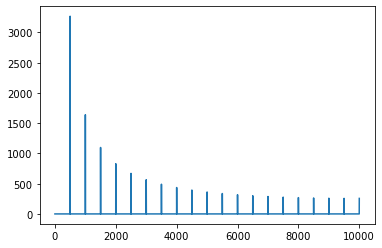

In [241]:
sawtooth_spectrum = sawtooth_wave.make_spectrum()
sawtooth_spectrum.plot()

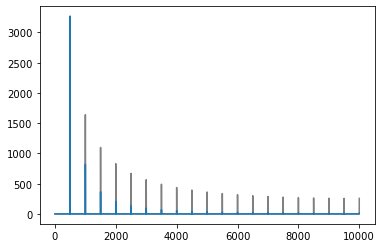

In [242]:
sawtooth_spectrum.plot(color='gray')
filter_spectrum(sawtooth_spectrum)
sawtooth_spectrum.scale(freq)
sawtooth_spectrum.plot()

In [243]:
temp_wave = sawtooth_spectrum.make_wave()
temp_wave.make_audio()

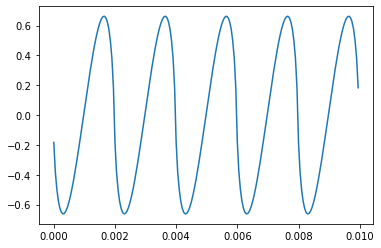

In [244]:
temp_wave.segment(duration=0.01).plot()

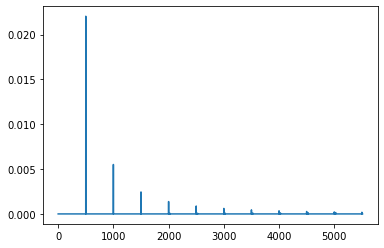

In [245]:
from thinkdsp import CosSignal

freqs = np.arange(500, 9500, 500)
amps = 1 / freqs**2
cos_signal = sum(CosSignal(freq, amp) for freq, amp in zip(freqs, amps))

cos_signal.make_wave().make_spectrum().plot()

In [246]:
cos_wave = cos_signal.make_wave(duration=0.5, framerate=20000)
cos_wave.make_audio()

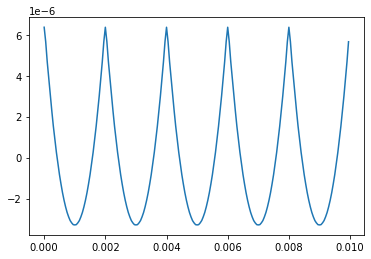

In [247]:
cos_wave.segment(duration=0.01).plot()

In [248]:
from thinkdsp import ParabolicSignal

par_wave = ParabolicSignal(freq=500).make_wave(duration=0.5, framerate=20000)
par_wave.make_audio()

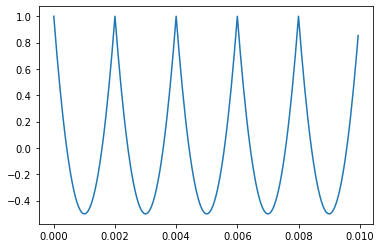

In [249]:
par_wave.segment(duration=0.01).plot()

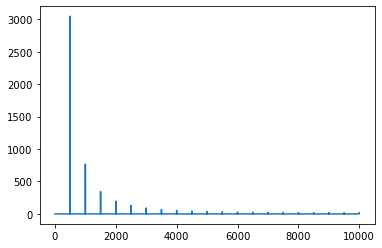

In [250]:
par_wave.make_spectrum().plot()